<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.6 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

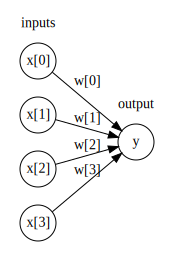

In [3]:
mglearn.plots.plot_logistic_regression_graph()

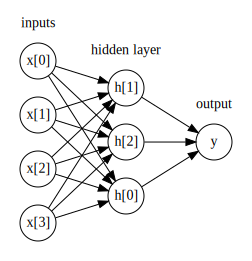

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

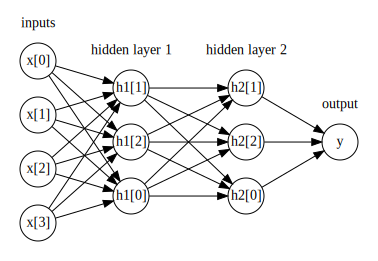

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

In [6]:
#신경망 튜닝

Text(0, 0.5, 'feat1')

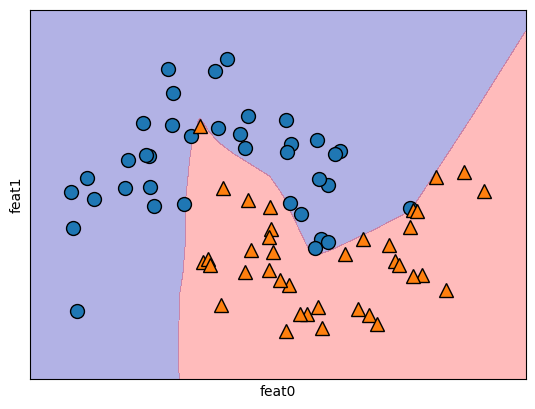

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise= 0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat0")
plt.ylabel("feat1")

Text(0, 0.5, 'feat1')

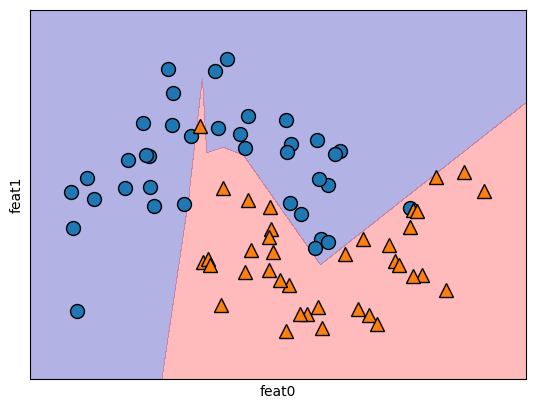

In [10]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat0")
plt.ylabel("feat1")

Text(0, 0.5, 'feat1')

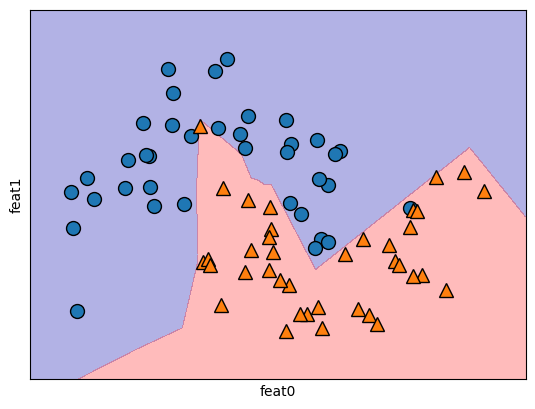

In [11]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10,10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat0")
plt.ylabel("feat1")

Text(0, 0.5, 'feat1')

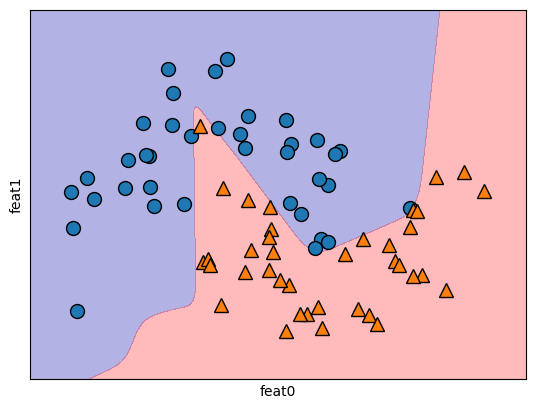

In [13]:
mlp = MLPClassifier(solver="lbfgs", activation="tanh", random_state=0, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feat0")
plt.ylabel("feat1")

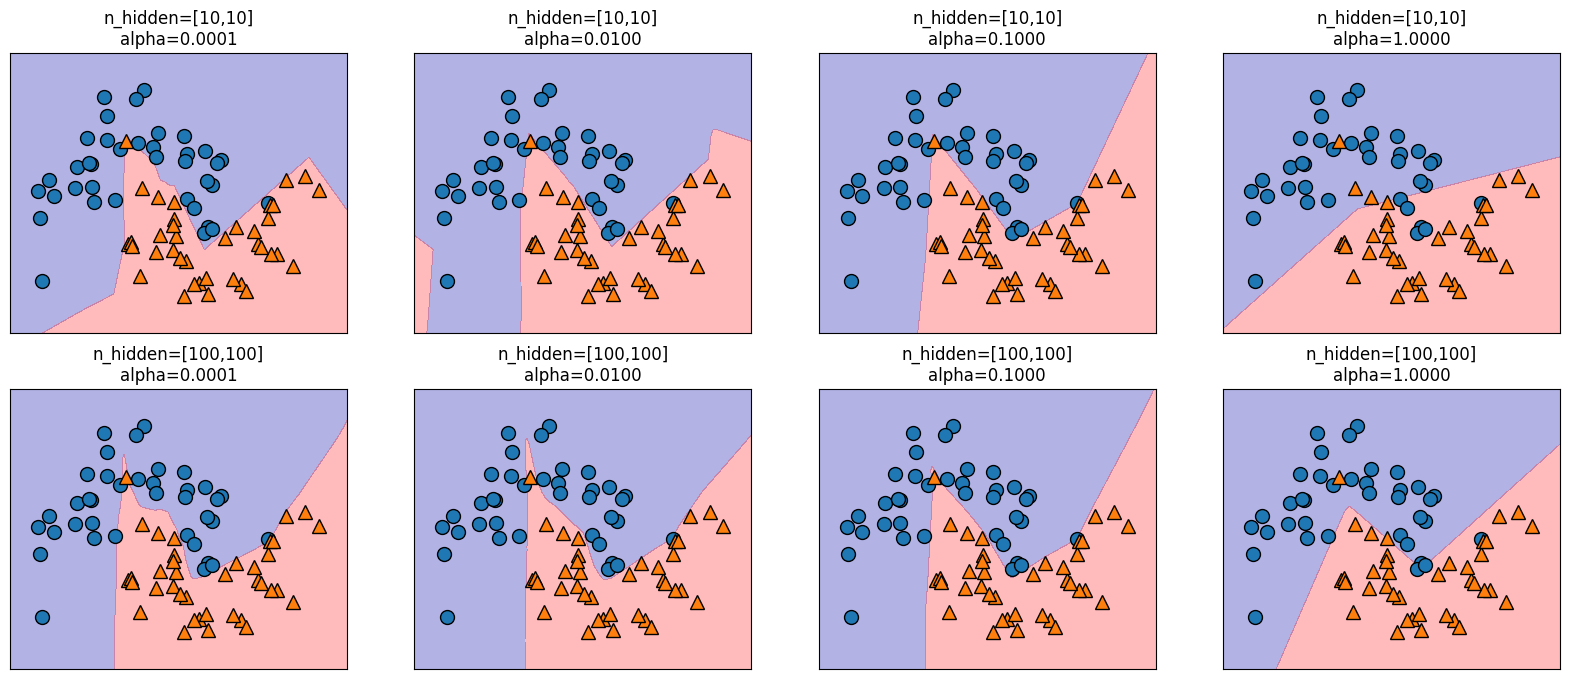

In [16]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver="lbfgs", random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha = alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))


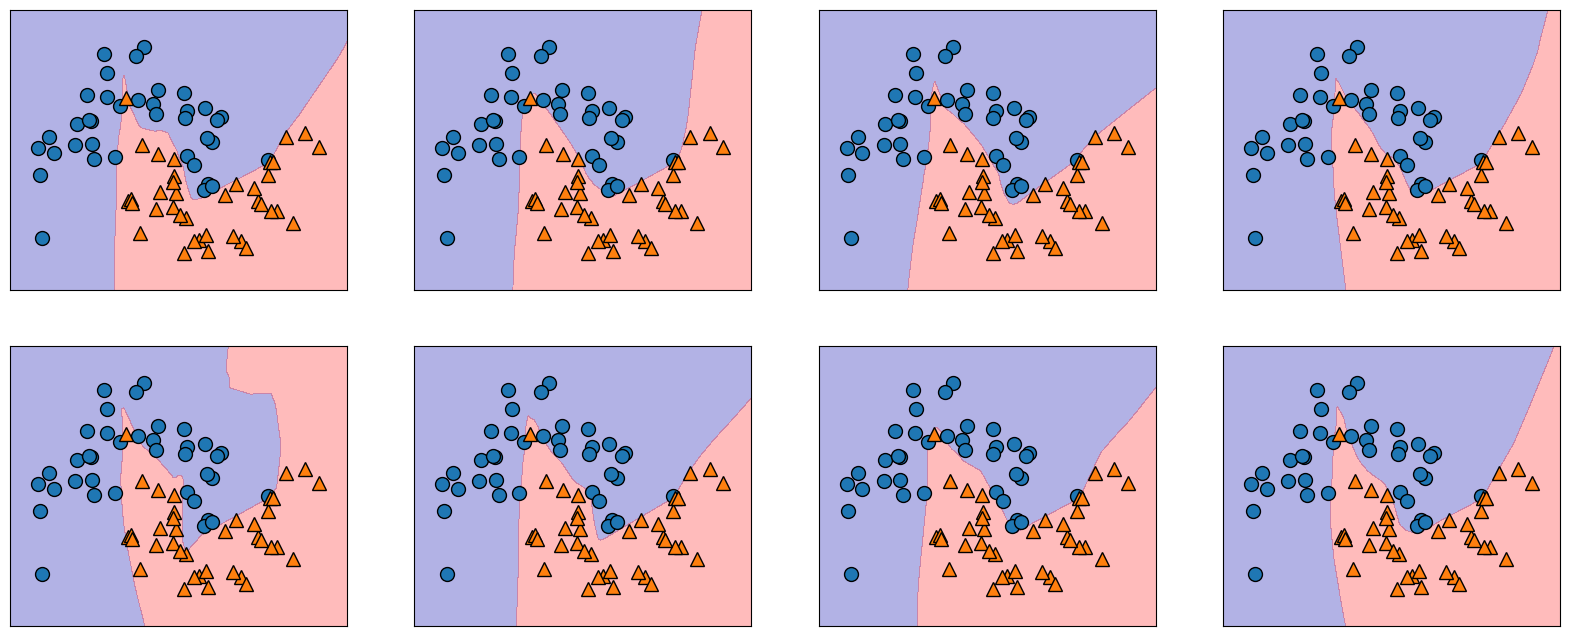

In [17]:
fig, axes = plt.subplots(2,4,figsize=(20,8))

for i, ax in enumerate(axes.ravel()):
  mlp = MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100,100])
  mlp.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
  mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("train set acc:{:.2f}".format(mlp.score(X_train, y_train)))
print("test set acc:{:.2f}".format(mlp.score(X_test, y_test)))

train set acc:0.94
test set acc:0.92


In [23]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train)/ std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc:0.991
test set acc:0.965


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc:1.000
test set acc:0.972


In [25]:
mlp = MLPClassifier(max_iter = 1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("train set acc:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test set acc:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

train set acc:0.988
test set acc:0.972


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*ar

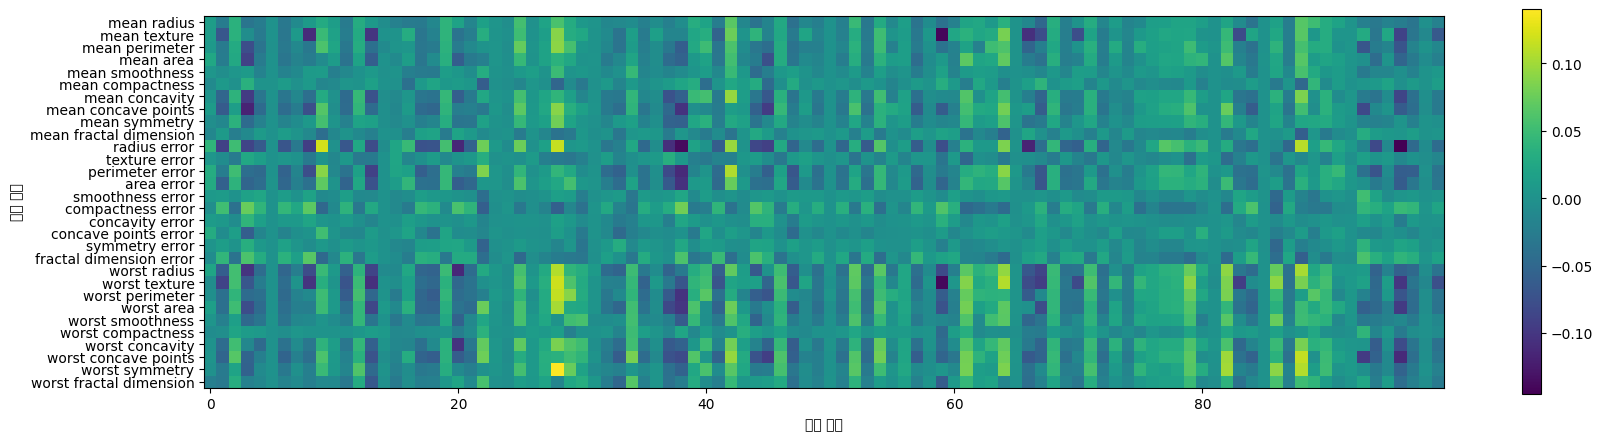

In [26]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()